In [1]:
# Import whole catalog - though many months are missing
import pandas as pd
import os, sys, glob
pklfile = 'mvo_catalog_stats.pkl'
if os.path.isfile(pklfile):
    dfall = pd.read_pickle(pklfile)
else:
    csvfiles = sorted(glob.glob('/home/thompsong/work/PROJECTS/MachineLearning/CSV/reawav_MVOE_*'))
    for i, csvfile in enumerate(csvfiles):
        print(i, csvfile)
        if i==0:
            dfall = pd.read_csv(csvfile, index_col=None)
        else:
            thisdf = pd.read_csv(csvfile, index_col=None)
            dfall = pd.concat([dfall, thisdf])
    dfall.to_pickle(pklfile)

In [2]:
print(dfall.columns)
dfall[['quality', 'snr', 'detection_quality']].describe()

Index(['filetime', 'starttime', 'Fs', 'calib', 'quality', 'medianF', 'peakF',
       'peakA', 'bw_min', 'bw_max', 'snr', 'signal_level', 'noise_level',
       'peakamp', 'peaktime', 'energy', 'sample_min', 'sample_max',
       'sample_mean', 'sample_median', 'sample_lower_quartile',
       'sample_upper_quartile', 'sample_rms', 'sample_stdev',
       'percent_availability', 'num_gaps', 'skewness', 'kurtosis',
       'bandratio_[1.0_6.0_11.0]', 'bandratio_[0.8_4.0_16.0]', 'path',
       'num_traces', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'ontime', 'offtime', 'trigger_duration', 'coincidence_sum',
       'cft_peak_wmean', 'cft_std_wmean', 'detection_quality', 'sfile',
       'mainclass', 'subclass'],
      dtype='object')


,quality,snr,detection_quality
count,388944.000000,388944.000000,298451.000000
mean,5.158586,2.267685,95.181402
std,0.247043,0.551732,67.657504
min,3.885000,1.321723,2.156071
25%,4.975000,2.082871,43.844519
50%,5.130000,2.226803,77.782984
75%,5.335000,2.389663,130.425994
max,6.190000,82.501975,764.823976




Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


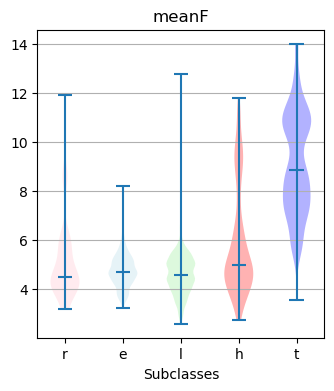



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


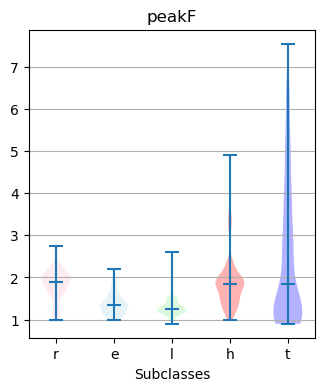



Processing subclass= r
detection_quality filter cut from 156972 events to 258


Processing subclass= e
detection_quality filter cut from 37583 events to 2161


Processing subclass= l
detection_quality filter cut from 78868 events to 5286


Processing subclass= h
detection_quality filter cut from 13315 events to 629


Processing subclass= t
detection_quality filter cut from 4937 events to 939


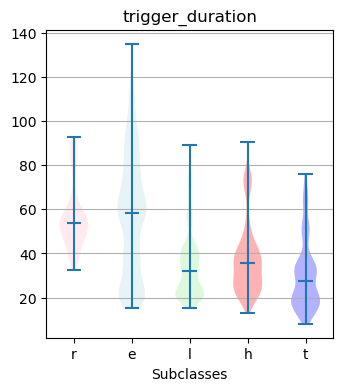



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


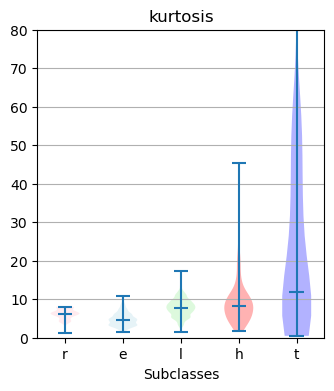



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


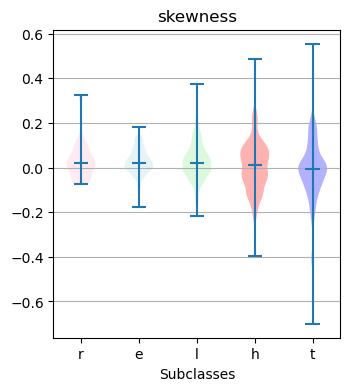



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


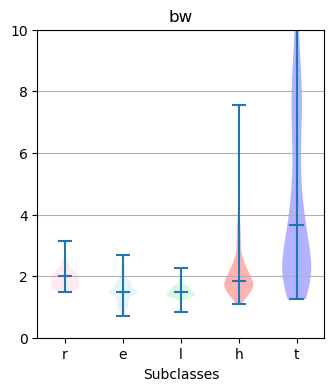



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


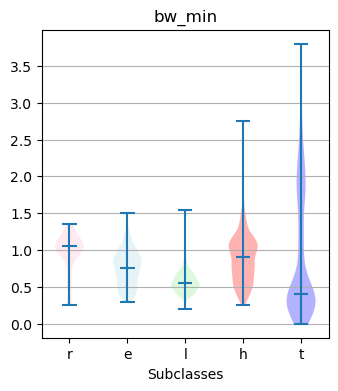



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


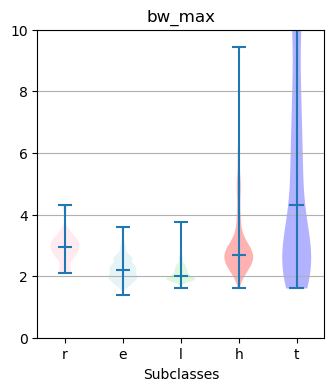



Processing subclass= r
detection_quality filter cut from 240141 events to 258


Processing subclass= e
detection_quality filter cut from 37908 events to 2161


Processing subclass= l
detection_quality filter cut from 79930 events to 5286


Processing subclass= h
detection_quality filter cut from 13786 events to 629


Processing subclass= t
detection_quality filter cut from 5123 events to 939


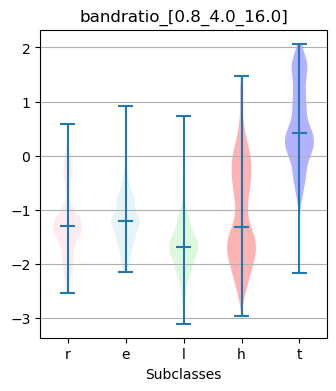

In [3]:
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
dfall.rename(columns={"medianF": "meanF"}, inplace=True)
subclasses = ['r', 'e', 'l', 'h', 't']
import matplotlib.pyplot as plt
for col in ['meanF', 'peakF', 'trigger_duration', 'kurtosis', 'skewness', 'bw', 'bw_min', 'bw_max', 'bandratio_[0.8_4.0_16.0]']:
    all_data = []
    for subclass in subclasses:
        print('\n\nProcessing subclass=',subclass)
        subclassDF = dfall[dfall['subclass']==subclass]
        
        subclassDF['bw'] = subclassDF['bw_max']-subclassDF['bw_min']
        subclassDF.dropna(subset=[col], inplace=True)
        L0 = len(subclassDF)
        subclassDF = subclassDF[subclassDF['detection_quality']>250.0]   
        L1 = len(subclassDF)
        print(f'detection_quality filter cut from {L0} events to {L1}')
        #print(subclassDF[['quality', 'snr', 'detection_quality']].describe())

        #subclassSTATS = subclassDF[['medianF', 'peakF', 'trigger_duration']].describe()

        all_data.append(subclassDF[col].to_list() )

    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(3.7, 4))

    # rectangular box plot
    '''
    bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=subclasses)  # will be used to label x-ticks
    '''
    vplot1 = ax1.violinplot(all_data,
                            showmeans=False,
                            showmedians=True)   
    ax1.set_title(col)


    # fill with colors
    colors = ['pink', 'lightblue', 'lightgreen', 'red', 'blue']
    for patch, color in zip(vplot1['bodies'], colors):
        patch.set_facecolor(color)

    # adding horizontal grid lines
    ax1.yaxis.grid(True)
    ax1.set_xlabel('Subclasses')
    #ax1.set_ylabel(col)
    if col=='kurtosis':
        ax1.set_ylim([0, 80])
    if col=='bw' or col=='bw_max':
        ax1.set_ylim([0, 10])
    ax1.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=subclasses)
    plt.savefig('shv_catalog_' + col + '.png', format='png')
    plt.show() 


In [4]:
# display 5 random examples of each signal type
import numpy as np
import sys
from pathlib import Path
import obspy
localLibPath = Path.cwd().resolve().parents[0].joinpath('lib')
sys.path.append(str(localLibPath))
import metrics

    
def fix_montserrat_seed_ids(st):
    for tr in st:
        if len(tr.stats.channel)==2 and len(tr.stats.location)==1:
           tr.stats.channel = tr.stats.channel + tr.stats.location 
           tr.stats.location =""
        if tr.stats.channel[0:2]=='SB':
            tr.stats.channel = 'BH' + tr.stats.channel[2:]
        if tr.stats.channel[0:2]=='S ':
            tr.stats.channel = 'SH' + tr.stats.channel[2:]    
        if tr.stats.channel == 'PRS':
            tr.stats.channel = 'BDO' # microbarometer, possible an absolute, very-long-period instrument
        tr.stats.location = ""
        if tr.stats.network == "":
            tr.stats.network = 'MV'
        correct_seed_id(tr)    

def correct_seed_id(tr):
    net, sta, loc, chan = tr.id.split('.')
    Fs = tr.stats.sampling_rate
    code0 = chan[0]
    if Fs < 80.0 and Fs > 20.0:
        if chan[0] == 'E': 
            code0 = 'S'
        elif chan[0] == 'H': 
            code0 = 'B'
    elif Fs > 80.0 and Fs < 250.0:
        if chan[0] == 'B': 
            code0 = 'H'
        elif chan[0] == 'S': 
            code0 = 'E'
    chan = code0 + chan[1:] 

subclasses = ['r', 'e', 'l', 'h', 't']
for subclass in subclasses:
    print('\n\nProcessing subclass=',subclass)
    subclassDF = dfall[dfall['subclass']==subclass]
    subclassDF.dropna(subset=['trigger_duration'], inplace=True)
    L0 = len(subclassDF)
    subclassDF = subclassDF[subclassDF['detection_quality']>350.0]   
    L1 = len(subclassDF)
    print(f'detection_quality filter cut from {L0} events to {L1}')
    for rownum in np.random.randint(L1, size=1):
        row = subclassDF.iloc[rownum]
        wavpath = os.path.join('/data/SEISAN_DB', row['path'][2:])
        if os.path.isfile(wavpath):
            print(wavpath)
            st = obspy.read(wavpath)
            fix_montserrat_seed_ids(st)
            st = st.select(component='Z')
            for tr in st:
                qf = metrics.process_trace(tr, inv=None, quality_threshold=0.0)
                if qf < 1.0:
                    st.remove(tr)
            st.plot(equal_scale=False, outfile=f'{subclass}.png');
        else:
            print('Cannot find ',wavpath)
            



Processing subclass= r
detection_quality filter cut from 156972 events to 22
/data/SEISAN_DB/WAV/MVOE_/2005/12/2005-12-02-2136-52S.MVO___035


Processing subclass= e
detection_quality filter cut from 37583 events to 188
/data/SEISAN_DB/WAV/MVOE_/2006/10/2006-10-24-0638-41S.MVO___025


Processing subclass= l
detection_quality filter cut from 78868 events to 693
/data/SEISAN_DB/WAV/MVOE_/2006/04/2006-04-07-0355-53S.MVO___030


Processing subclass= h
detection_quality filter cut from 13315 events to 94
/data/SEISAN_DB/WAV/MVOE_/2005/10/2005-10-08-1117-32S.MVO___036


Processing subclass= t
detection_quality filter cut from 4937 events to 376
/data/SEISAN_DB/WAV/MVOE_/2005/10/2005-10-13-1158-37S.MVO___036
